In [1]:
import sys
import datetime
import pandas as pd

path_root = '../../..'
sys.path.append(f'{path_root}/')
from src.util.functions import Functions
from src.visualize.visualizer import BarPlot
# Disable warning
pd.options.mode.chained_assignment = None 

level = 'regioni'
region_name = 'p.a. bolzano'

path_data = f'{path_root}/data'
path_img_root = f'{path_data}/imgs/grafici/{level}/{region_name}'
path_csv = f'{path_data}/csv'
csv_in_name = f'{path_csv}/{level}/covid19-{region_name}.csv'

In [2]:
df_raw = pd.read_csv(csv_in_name)
df_raw

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-02-25T18:00:00,21,P.A. Bolzano,1,0,1,0,1,1,1,...,0.0,0.0,0.0,0.0,0.00,100.00,0.00,0.00,0.00,0.00
1,2020-02-26T18:00:00,21,P.A. Bolzano,1,0,1,0,1,0,0,...,0.0,0.0,0.0,0.0,0.00,100.00,0.00,0.00,0.00,0.00
2,2020-02-27T18:00:00,21,P.A. Bolzano,1,0,1,0,1,0,0,...,0.0,1.0,0.0,0.0,0.00,100.00,0.00,0.00,0.00,0.00
3,2020-02-28T18:00:00,21,P.A. Bolzano,1,0,1,0,1,0,0,...,0.0,0.0,0.0,0.0,0.00,100.00,0.00,0.00,0.00,0.00
4,2020-02-29T17:00:00,21,P.A. Bolzano,1,0,1,0,1,0,0,...,0.0,14.0,0.0,0.0,0.00,100.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,2021-03-21T17:00:00,21,P.A. Bolzano,123,30,153,3155,3308,-209,76,...,0.0,5242.0,173.0,-209.0,19.61,4.63,1.45,43.93,-6.25,-5.94
391,2021-03-22T17:00:00,21,P.A. Bolzano,128,30,158,841,999,-2309,35,...,0.0,2895.0,145257.0,-2314.0,18.99,15.82,1.21,0.02,0.00,-69.80
392,2021-03-23T17:00:00,21,P.A. Bolzano,120,30,150,762,912,-87,148,...,4.0,14255.0,1877.0,-79.0,20.00,16.45,1.04,7.88,0.00,-8.71
393,2021-03-24T17:00:00,21,P.A. Bolzano,115,31,146,724,870,-42,162,...,2.0,12210.0,1677.0,-38.0,21.23,16.78,1.33,9.66,3.33,-4.61


In [3]:
last_date = datetime.datetime.fromisoformat(df_raw.tail(1).data.array[0])
last_date

datetime.datetime(2021, 3, 25, 17, 0)

In [4]:
# Print stats
# df_n[-2:].iloc[:, 1:]
df_last = df_raw[-1:]
print('Nuovi positivi:', df_last['nuovi_positivi'].item())
print('Nuovi tamponi:', df_last['nuovi_tamponi'].item())
print('Percentuale nuovi positivi/nuovi tamponi:', round(df_last['nuovi_positivi'].item()/df_last['nuovi_tamponi'].item(), 3) * 100, '%')
print('Nuovi guariti:', df_last['nuovi_dimessi_guariti'].item())
print('Nuovi deceduti:', df_last['nuovi_deceduti'].item())
print('Variazione positivi ricoverati con sintomi:', df_last['variazione_ricoverati_con_sintomi'].item())
print('Variazione positivi in terapia intensiva:', df_last['variazione_terapia_intensiva'].item())
print('Variazione positivi in isolamento dimiciliare:', df_last['variazione_isolamento_domiciliare'].item())

Nuovi positivi: 137
Nuovi tamponi: 10500.0
Percentuale nuovi positivi/nuovi tamponi: 1.3 %
Nuovi guariti: 95.0
Nuovi deceduti: 1.0
Variazione positivi ricoverati con sintomi: -9.0
Variazione positivi in terapia intensiva: 0.0
Variazione positivi in isolamento dimiciliare: 48.0


In [5]:
last_date = datetime.datetime.fromisoformat(df_raw.tail(1).data.array[0])
last_date

datetime.datetime(2021, 3, 25, 17, 0)

In [6]:
# TODO: define function
days = 60
path_img = '{path_img_root}/{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
date_threshold_str
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2021-01-24T17:00:00,21,P.A. Bolzano,226,25,251,13248,13499,113,412,...,4.0,5890.0,785.0,105.0,9.96,1.86,6.99,52.48,4.17,0.84
1,2021-01-25T17:00:00,21,P.A. Bolzano,239,28,267,13308,13575,76,200,...,4.0,2669.0,351.0,60.0,10.49,1.97,7.49,56.98,12.00,0.56
2,2021-01-26T17:00:00,21,P.A. Bolzano,225,30,255,13751,14006,431,559,...,8.0,8051.0,355.0,443.0,11.76,1.82,6.94,157.46,7.14,3.17
3,2021-01-27T17:00:00,21,P.A. Bolzano,217,32,249,13995,14244,238,548,...,2.0,8236.0,774.0,244.0,12.85,1.75,6.65,70.80,6.67,1.70
4,2021-01-28T17:00:00,21,P.A. Bolzano,216,30,246,14294,14540,296,562,...,4.0,7767.0,717.0,299.0,12.20,1.69,7.24,78.38,-6.25,2.08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,2021-03-21T17:00:00,21,P.A. Bolzano,123,30,153,3155,3308,-209,76,...,0.0,5242.0,173.0,-209.0,19.61,4.63,1.45,43.93,-6.25,-5.94
57,2021-03-22T17:00:00,21,P.A. Bolzano,128,30,158,841,999,-2309,35,...,0.0,2895.0,145257.0,-2314.0,18.99,15.82,1.21,0.02,0.00,-69.80
58,2021-03-23T17:00:00,21,P.A. Bolzano,120,30,150,762,912,-87,148,...,4.0,14255.0,1877.0,-79.0,20.00,16.45,1.04,7.88,0.00,-8.71
59,2021-03-24T17:00:00,21,P.A. Bolzano,115,31,146,724,870,-42,162,...,2.0,12210.0,1677.0,-38.0,21.23,16.78,1.33,9.66,3.33,-4.61


In [7]:
# Define figures properties
graph_prop = {'path_root': path_img,
              'label_font': 14,
              'data': {'label': 'Data', 'ticks': lambda x: x.split('T')[0]},
              'nuovi_positivi': {'label': 'Nuovi positivi', 'file_name': 'nuovi_positivi'},
              'np_su_nt': {'label': 'Nuovi positivi / Nuovi tamponi (%)', 'file_name': 'nuovi_positivi_su_nuovi_tamponi'},
              'np_su_nct': {'label': 'Nuovi positivi / Nuovi casi testati (%)', 'file_name': 'nuovi_positivi_su_nuovi_casi_testati'},
              'totale_positivi': {'label': 'Totale positivi', 'file_name': 'totale_positivi'},
              'var_pos_perc': {'label': 'Variazione totale positivi (%)', 'file_name': 'variazione_totale_positivi_perc'},
              'terapia_intensiva': {'label': 'Terapia intensiva', 'file_name': 'terapia_intensiva'},
              'var_ti_perc': {'label': 'Variazione terapia intensiva (%)', 'file_name': 'variazione_terapia_intensiva_perc'},
              'ti_su_to': {'label': 'Terapia intensiva / Totale ospedalizzati (%)', 'file_name': 'terapia_intensiva_su_totale_ospedalizzati'},
              'saturazione_terapia_intensiva': {'label': 'Saturazione terapia intensiva (%)', 'file_name': 'saturazione_terapia_intensiva'},
              'totale_ospedalizzati': {'label': 'Totale ospedalizzati', 'file_name': 'totale_ospedalizzati'},
              'to_su_tp': {'label': 'Totale ospedalizzati / Totale positivi (%)', 'file_name': 'totale_ospedalizzati_su_totale_positivi'},
              'nuovi_deceduti': {'label': 'Nuovi deceduti', 'file_name': 'nuovi_deceduti'},
              'nuovi_dimessi_guariti': {'label': 'Nuovi dimessi guariti', 'file_name': 'nuovi_dimessi_guariti'}}

# Create BarPlot object
bp = BarPlot(df, 'data', graph_prop)

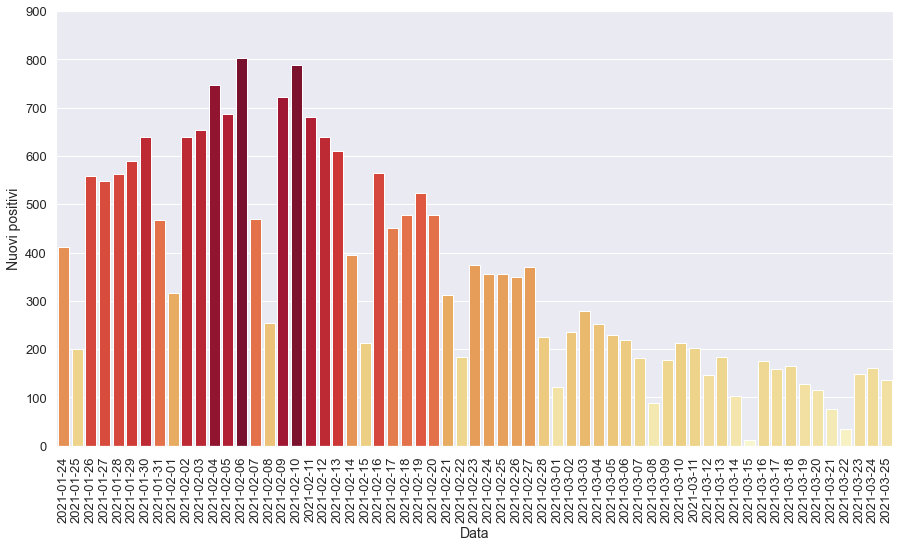

In [8]:
# New positives on new swabs in the last 60 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

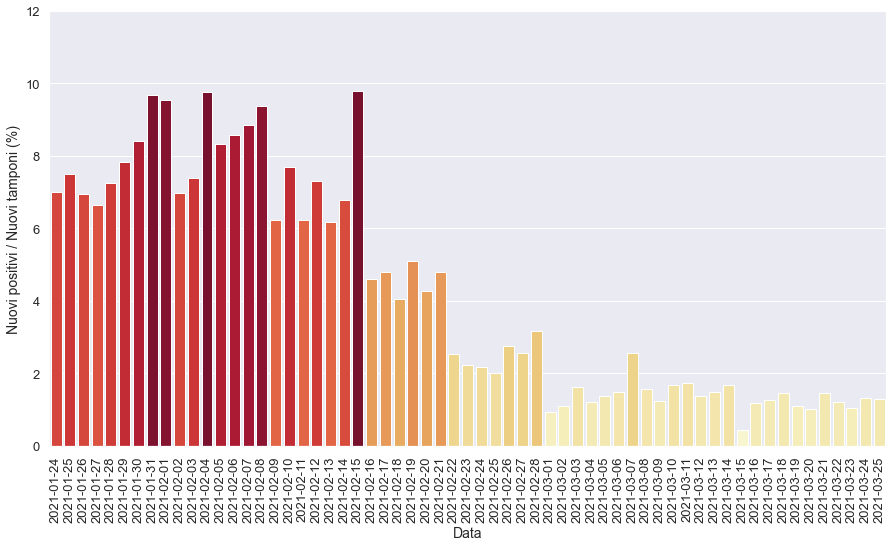

In [9]:
# New positives on new swabs in the last 60 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

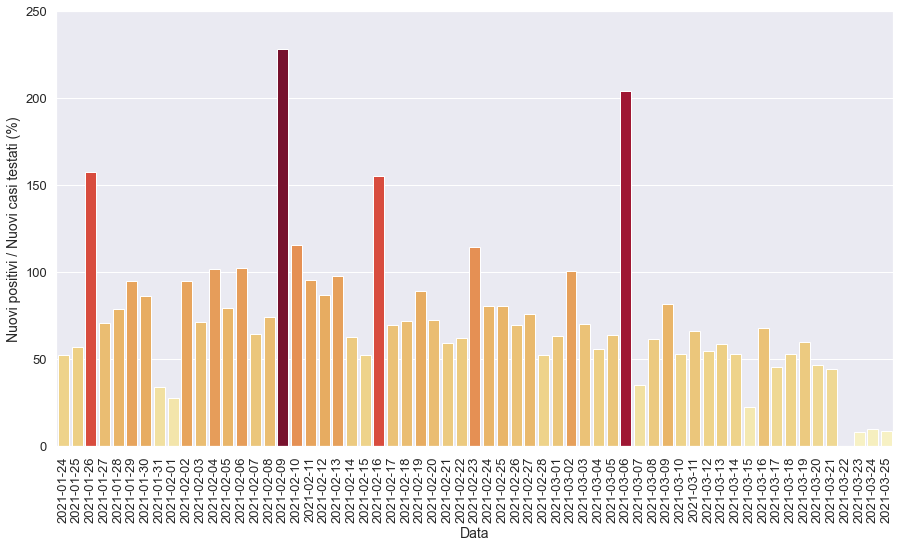

In [10]:
# New positives on new tested cases in the last 60 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

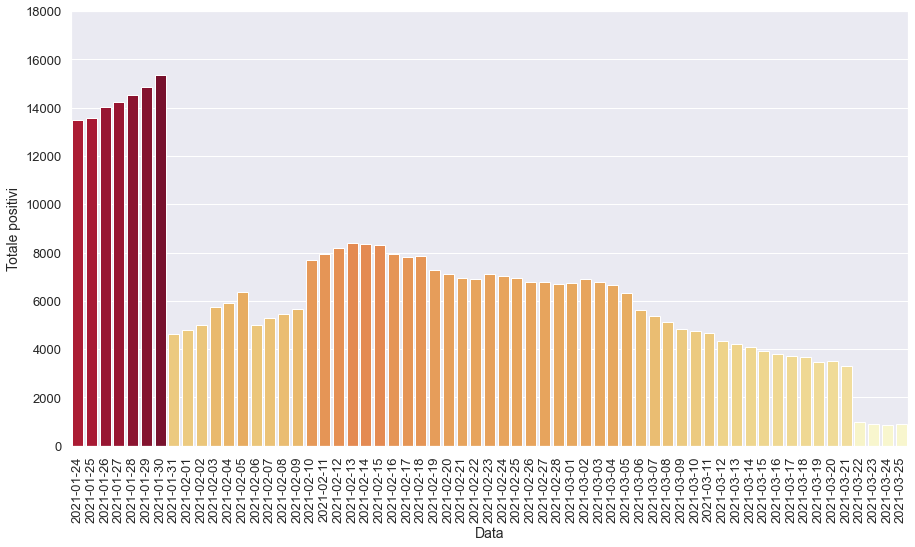

In [11]:
# Percentage of variation of positives in the last 60 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

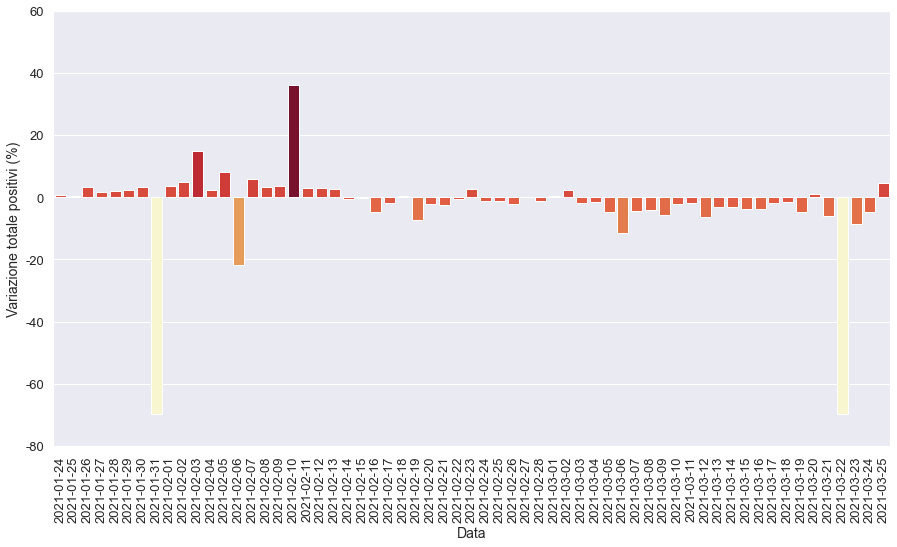

In [12]:
# Percentage of variation of total positives in the last 60 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

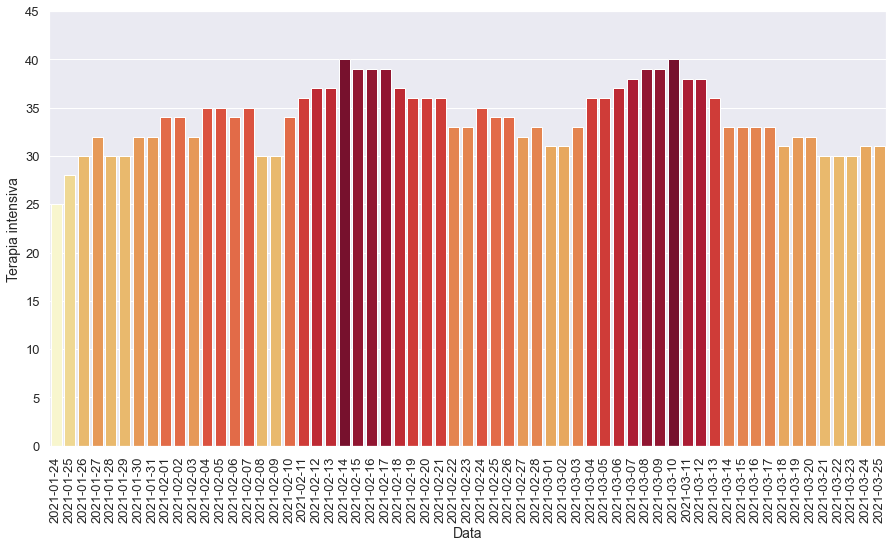

In [13]:
# Positives in ICU in the last 60 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

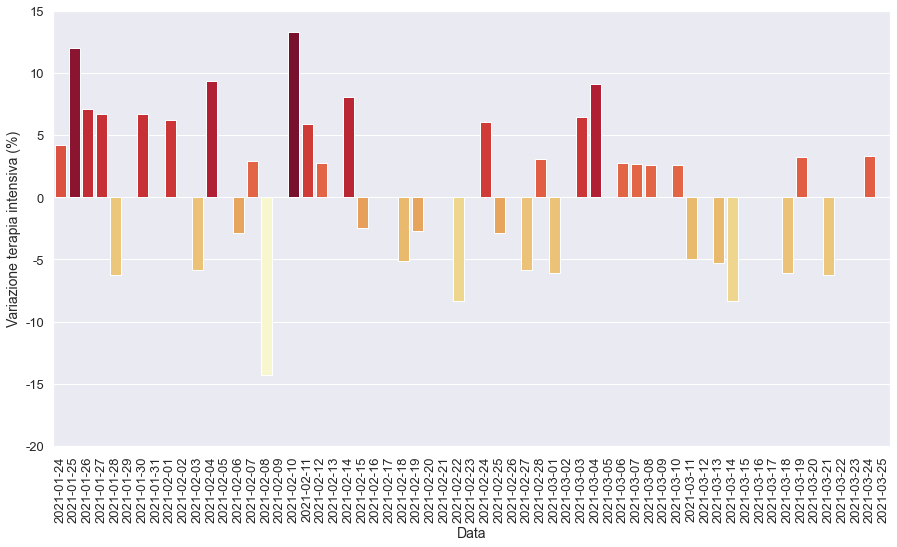

In [14]:
# Percentage of variation of positives in ICU in the last 60 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

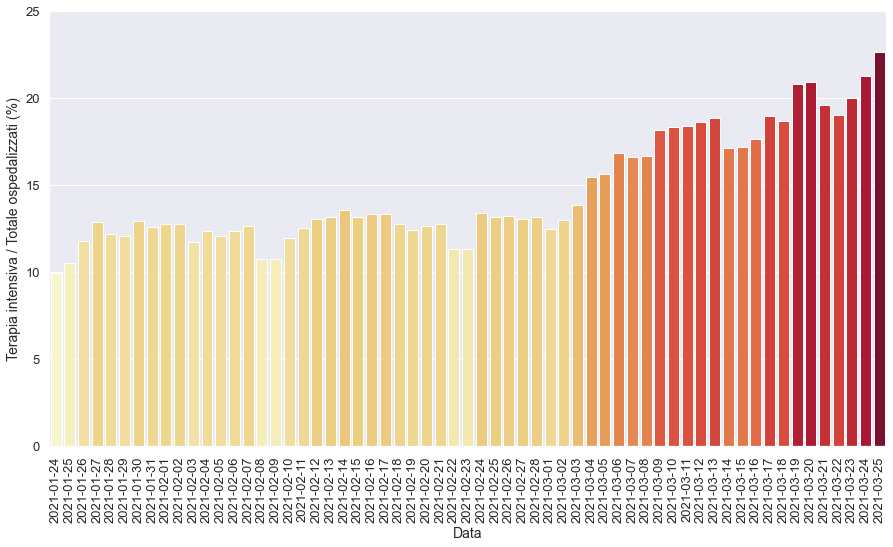

In [15]:
# Positives in ICU in the last 60 days
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

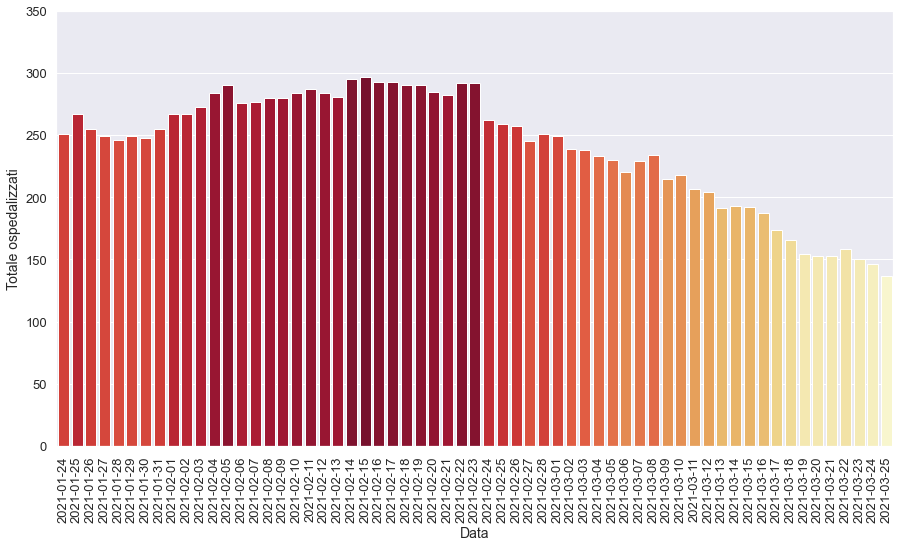

In [16]:
# Hospitalized positives in the last 60 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

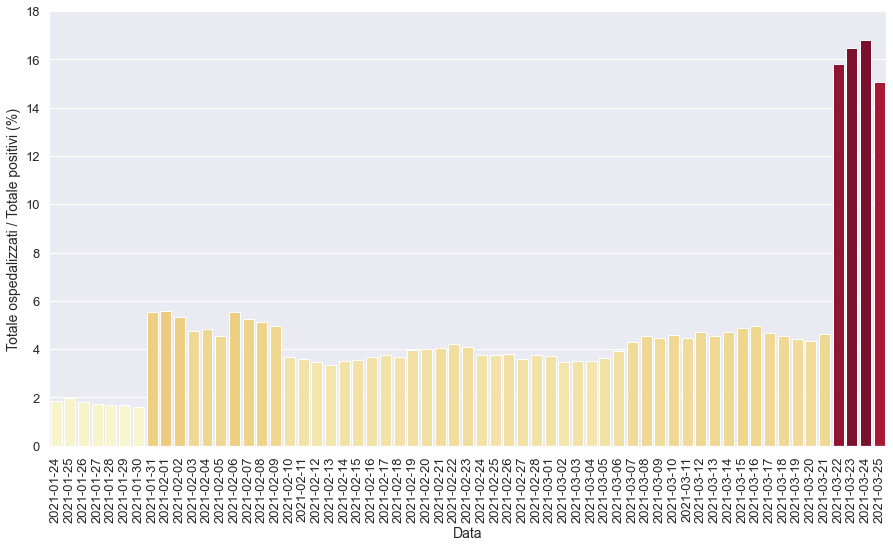

In [17]:
# Hospitalized positives in the last 60 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

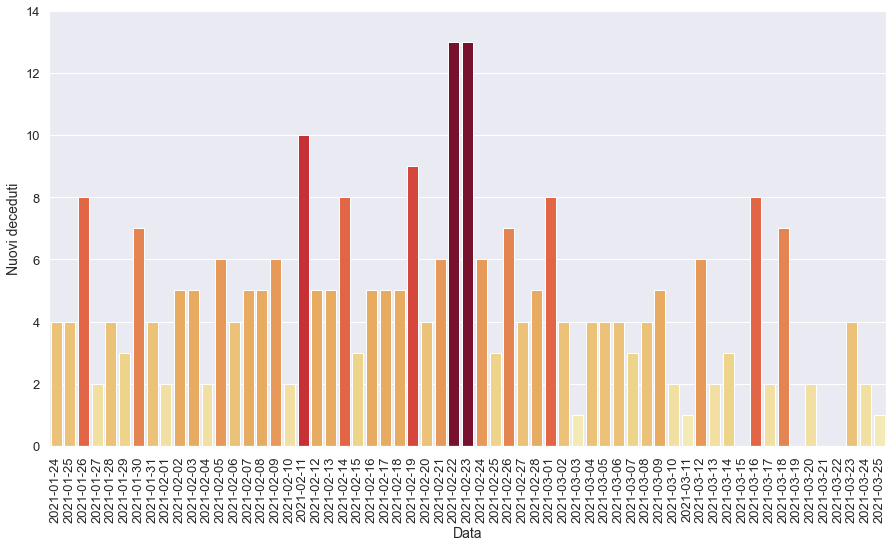

In [18]:
# New deads in the last 60 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

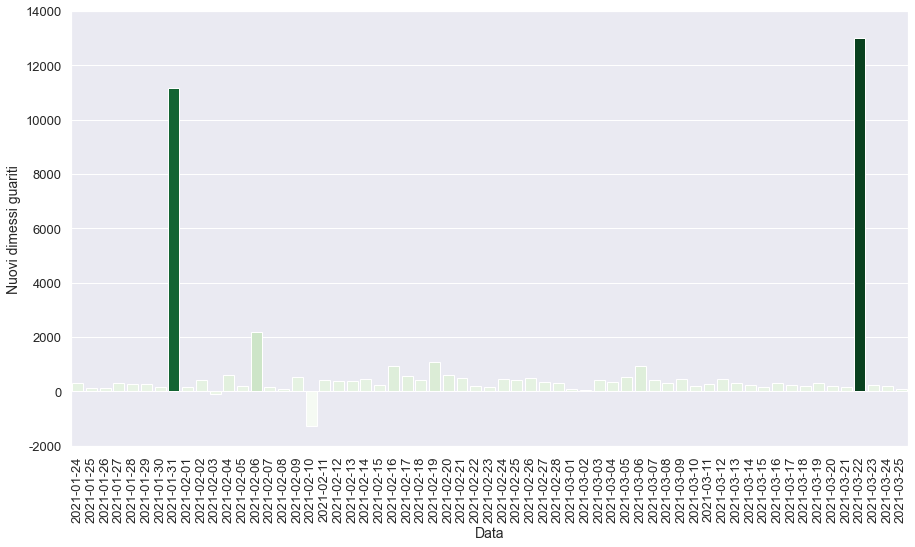

In [19]:
# New healed in the last 60 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)

In [20]:
# TODO: define function
days = 30
path_img = '{path_img_root}/{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
date_threshold_str
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df;

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2021-02-23T17:00:00,21,P.A. Bolzano,259,33,292,6814,7106,182,374,...,13.0,16870.0,328.0,182.0,11.30,4.11,2.22,114.02,0.00,2.63
1,2021-02-24T17:00:00,21,P.A. Bolzano,227,35,262,6749,7011,-95,355,...,6.0,16387.0,441.0,-65.0,13.36,3.74,2.17,80.50,6.06,-1.34
2,2021-02-25T17:00:00,21,P.A. Bolzano,225,34,259,6670,6929,-82,355,...,3.0,17777.0,443.0,-79.0,13.13,3.74,2.00,80.14,-2.86,-1.17
3,2021-02-26T17:00:00,21,P.A. Bolzano,223,34,257,6518,6775,-154,350,...,7.0,12745.0,502.0,-152.0,13.23,3.79,2.75,69.72,0.00,-2.22
4,2021-02-27T17:00:00,21,P.A. Bolzano,213,32,245,6539,6784,9,371,...,4.0,14425.0,490.0,21.0,13.06,3.61,2.57,75.71,-5.88,0.13
5,2021-02-28T17:00:00,21,P.A. Bolzano,218,33,251,6451,6702,-82,226,...,5.0,7151.0,432.0,-88.0,13.15,3.75,3.16,52.31,3.12,-1.21
6,2021-03-01T17:00:00,21,P.A. Bolzano,218,31,249,6477,6726,24,121,...,8.0,13192.0,191.0,26.0,12.45,3.70,0.92,63.35,-6.06,0.36
7,2021-03-02T17:00:00,21,P.A. Bolzano,208,31,239,6653,6892,166,236,...,4.0,21258.0,235.0,176.0,12.97,3.47,1.11,100.43,0.00,2.47
8,2021-03-03T17:00:00,21,P.A. Bolzano,205,33,238,6525,6763,-129,280,...,1.0,17322.0,401.0,-128.0,13.87,3.52,1.62,69.83,6.45,-1.87
9,2021-03-04T17:00:00,21,P.A. Bolzano,197,36,233,6424,6657,-106,253,...,4.0,21055.0,456.0,-101.0,15.45,3.50,1.20,55.48,9.09,-1.57


In [21]:
bp.df = df
graph_prop['path_root'] = path_img
bp.graph_prop = graph_prop

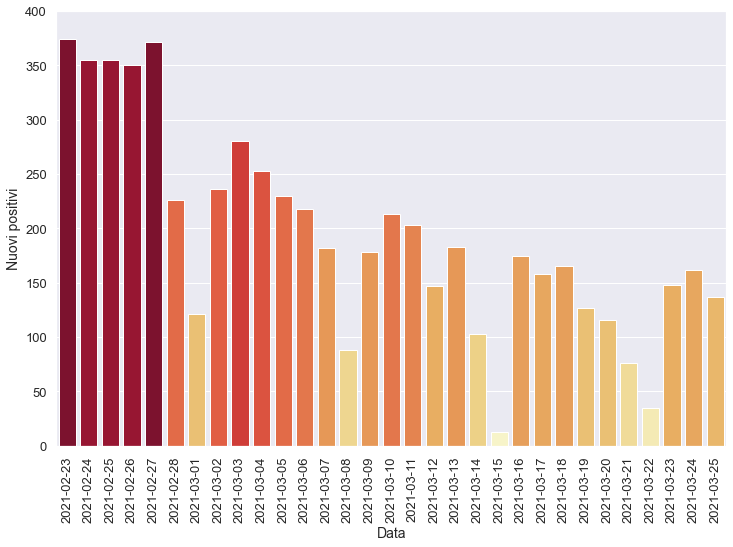

In [22]:
# New positives on new swabs in the last 30 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

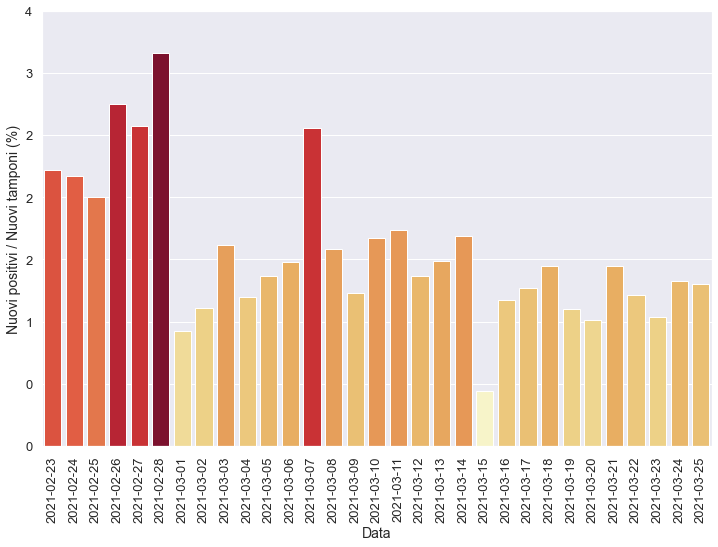

In [23]:
# New positives on new swabs in the last 30 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

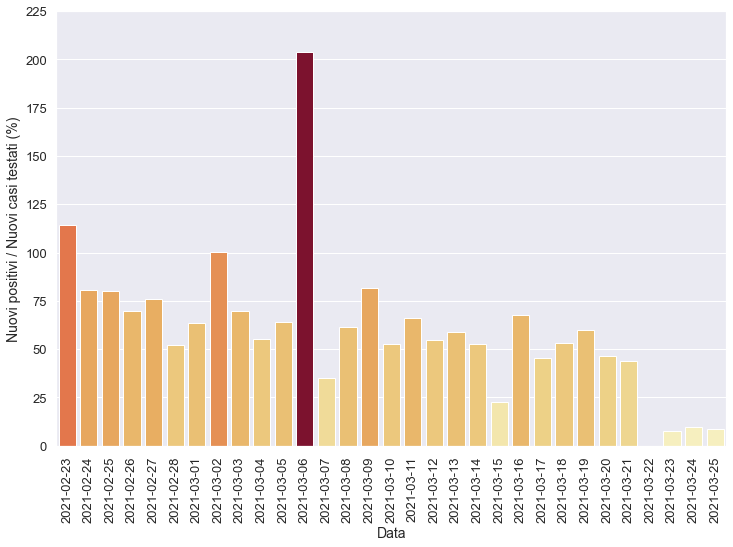

In [24]:
# New positives on new tested cases in the last 30 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

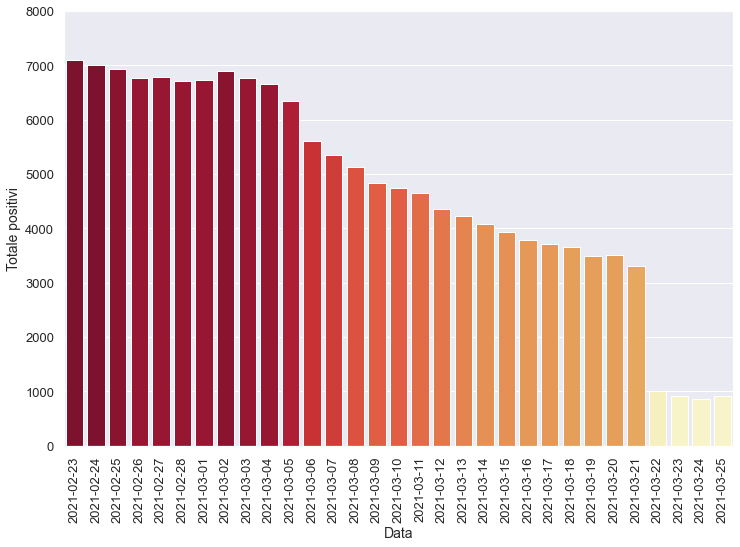

In [25]:
# Number of positives in the last 30 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

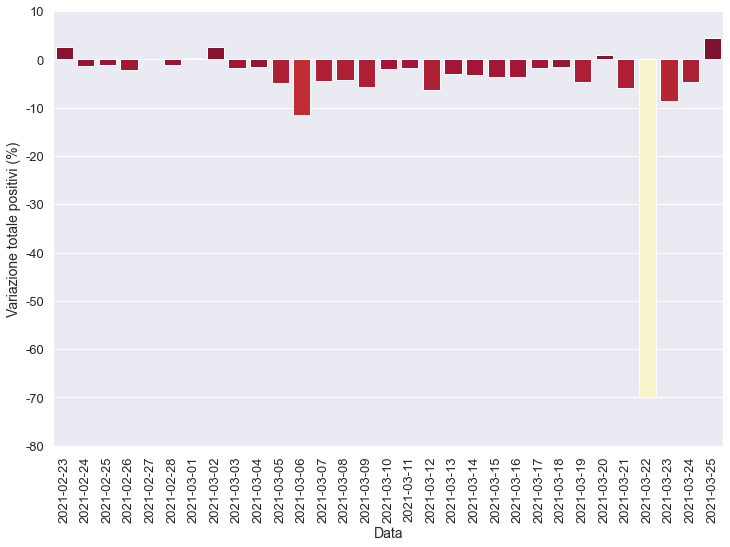

In [26]:
# Percentage of variation of positives in the last 30 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

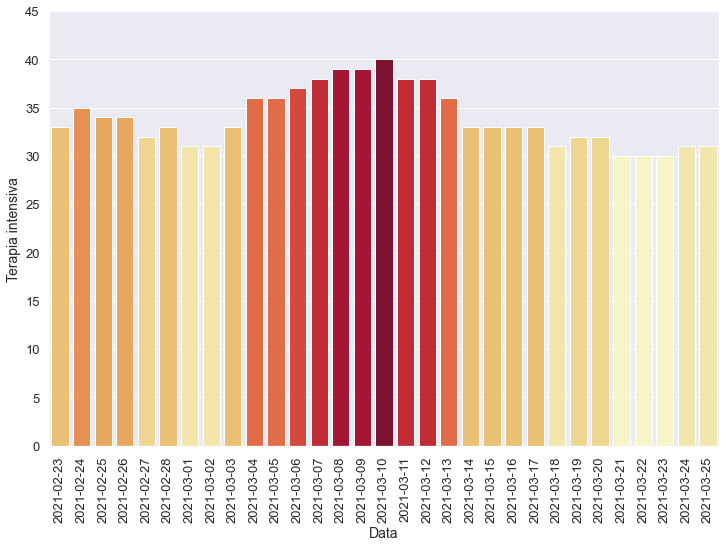

In [27]:
# Positives in ICU in the last 30 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

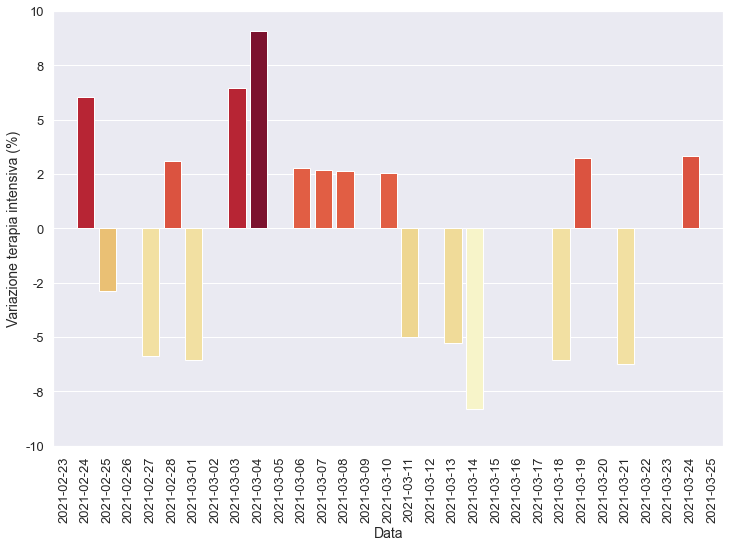

In [28]:
# Percentage of variation of positives in ICU in the last 30 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

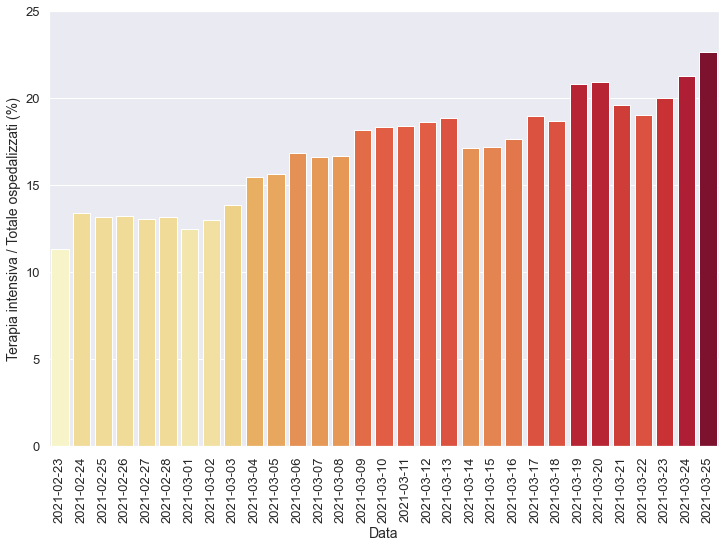

In [29]:
# TODO
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

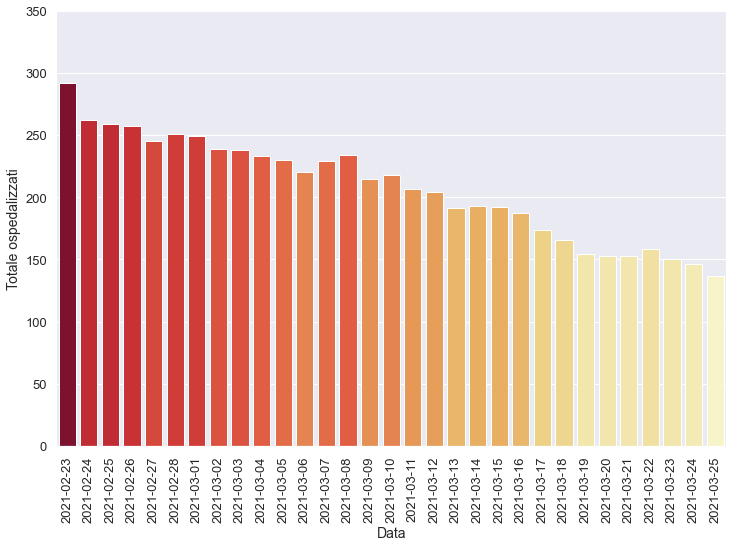

In [30]:
# Hospitalized positives in the last 30 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

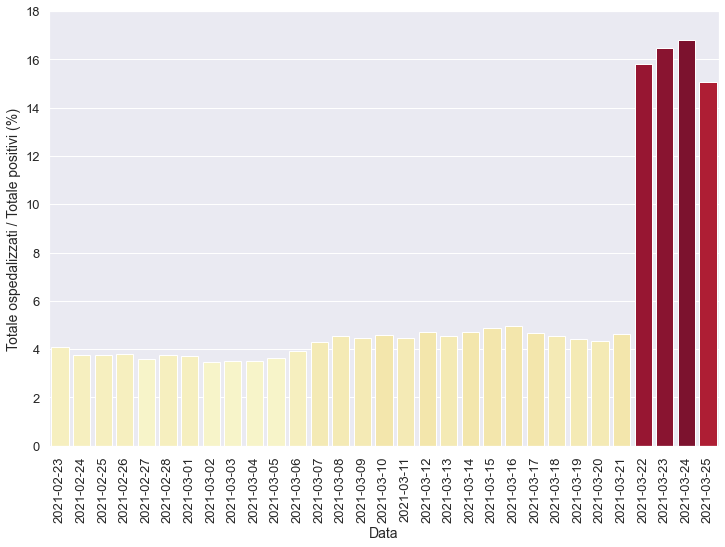

In [31]:
# Hospitalized positives in the last 30 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

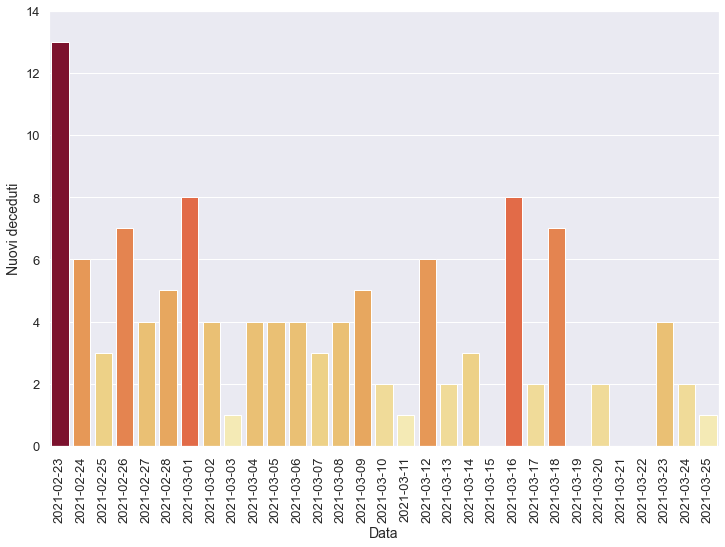

In [32]:
# New deads in the last 30 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

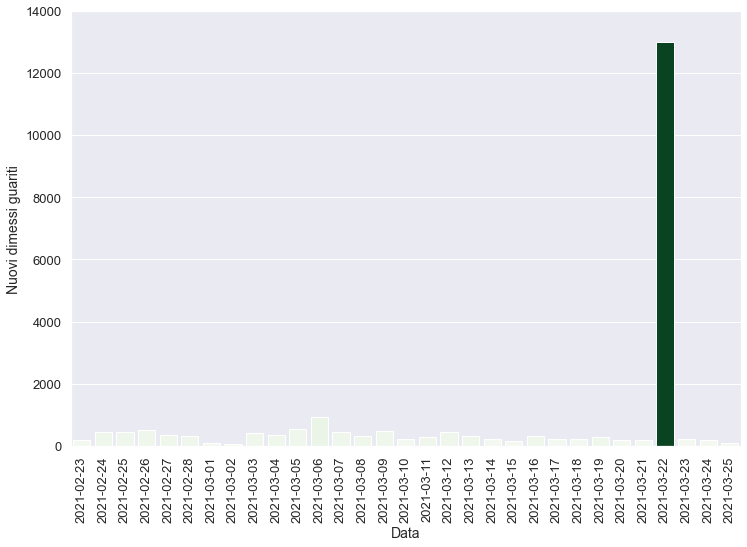

In [33]:
# New healed in the last 30 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)

In [34]:
# TODO: define function
days = 7
path_img = '{path_img_root}/0{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df;

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2021-03-18T17:00:00,21,P.A. Bolzano,135,31,166,3491,3657,-57,165,...,7.0,11355.0,311.0,-49.0,18.67,4.54,1.45,53.05,-6.06,-1.53
1,2021-03-19T17:00:00,21,P.A. Bolzano,122,32,154,3331,3485,-172,127,...,0.0,11582.0,212.0,-160.0,20.78,4.42,1.10,59.91,3.23,-4.70
2,2021-03-20T17:00:00,21,P.A. Bolzano,121,32,153,3364,3517,32,116,...,2.0,11452.0,251.0,33.0,20.92,4.35,1.01,46.22,0.00,0.92
3,2021-03-21T17:00:00,21,P.A. Bolzano,123,30,153,3155,3308,-209,76,...,0.0,5242.0,173.0,-209.0,19.61,4.63,1.45,43.93,-6.25,-5.94
4,2021-03-22T17:00:00,21,P.A. Bolzano,128,30,158,841,999,-2309,35,...,0.0,2895.0,145257.0,-2314.0,18.99,15.82,1.21,0.02,0.00,-69.80
5,2021-03-23T17:00:00,21,P.A. Bolzano,120,30,150,762,912,-87,148,...,4.0,14255.0,1877.0,-79.0,20.00,16.45,1.04,7.88,0.00,-8.71
6,2021-03-24T17:00:00,21,P.A. Bolzano,115,31,146,724,870,-42,162,...,2.0,12210.0,1677.0,-38.0,21.23,16.78,1.33,9.66,3.33,-4.61
7,2021-03-25T17:00:00,21,P.A. Bolzano,106,31,137,772,909,39,137,...,1.0,10500.0,1613.0,48.0,22.63,15.07,1.30,8.49,0.00,4.48


In [35]:
bp.df = df
graph_prop['path_root'] = path_img
bp.graph_prop = graph_prop

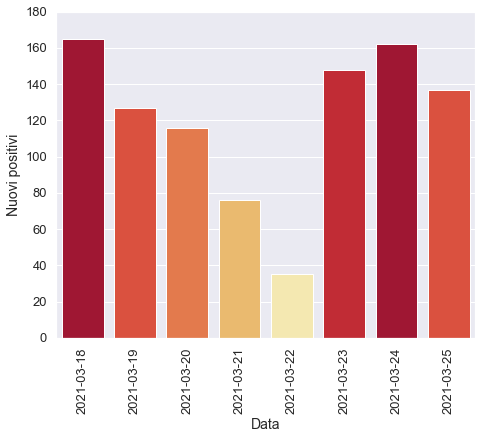

In [36]:
# New positives on new swabs in the last 7 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

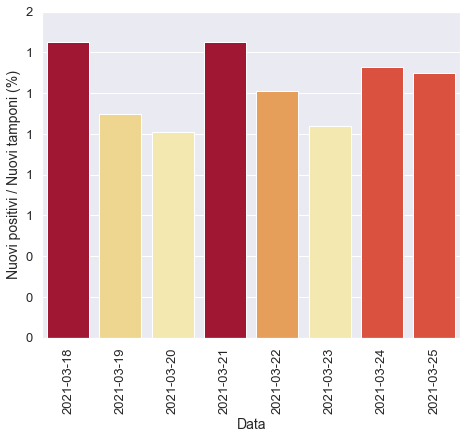

In [37]:
# New positives on new swabs in the last 7 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

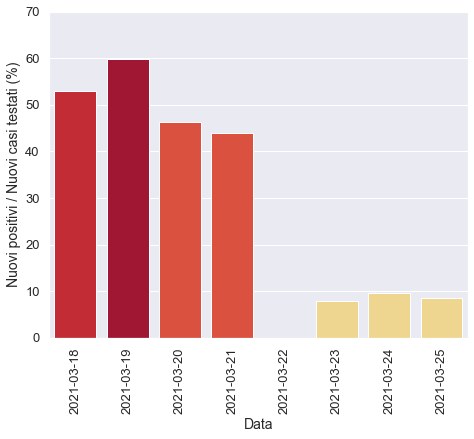

In [38]:
# New positives on new tested cases in the last 7 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

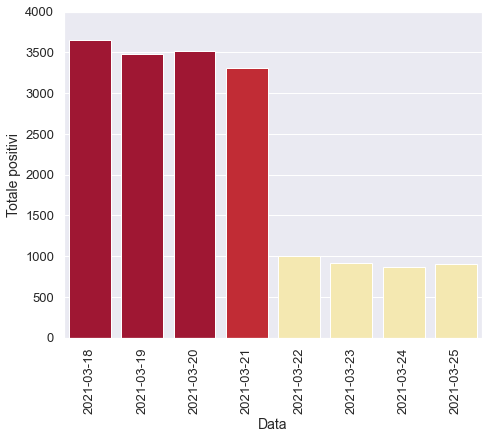

In [39]:
# Percentage of variation of positives in the last 7 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

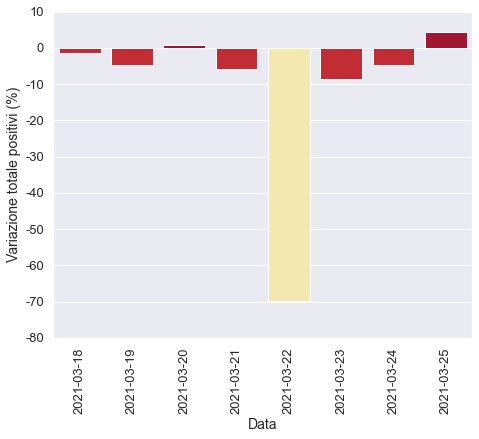

In [40]:
# Percentage of variation of positives in the last 7 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

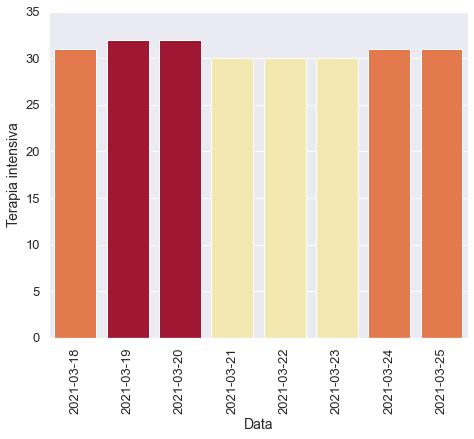

In [41]:
# Positives in ICU in the last 7 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

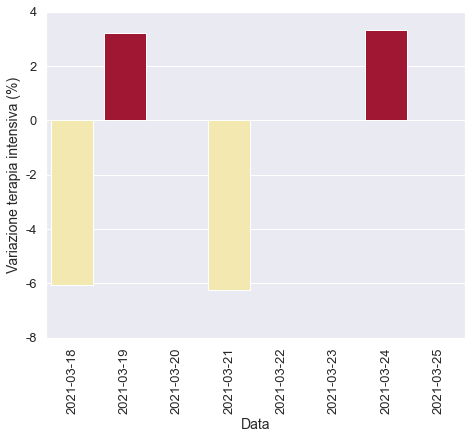

In [42]:
# Percentage of variation of positives in ICU in the last 30 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

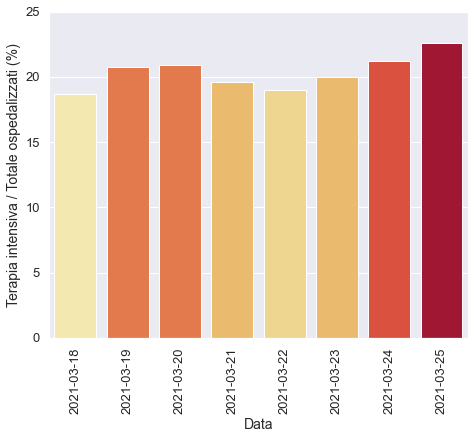

In [43]:
# Positives in ICU in the last 7 days
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

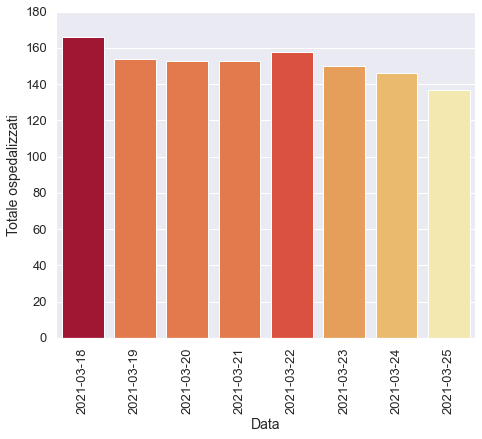

In [44]:
# Hospitalized positives in the last 7 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

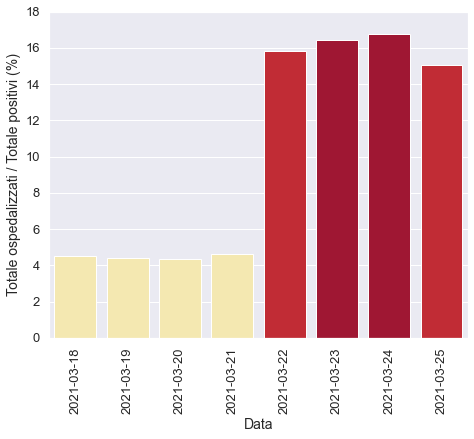

In [45]:
# Hospitalized positives in the last 7 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

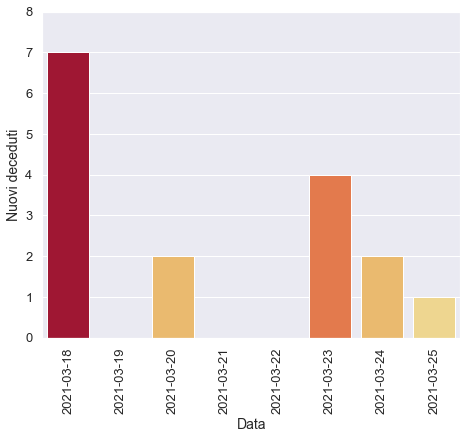

In [46]:
# New deads in the last 7 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

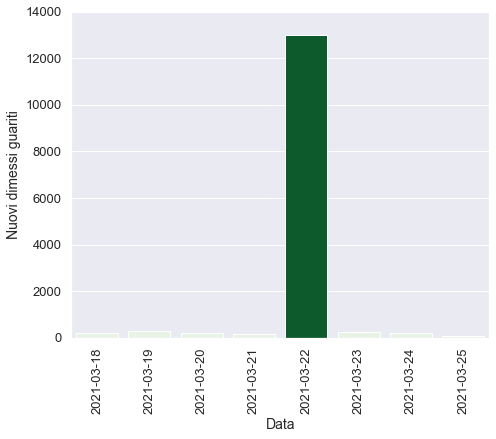

In [47]:
# New healed in the last 7 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)